In [1]:
import rasterio as rio 
import numpy as np
import imageio.v2 as imageio

## get pixel coords

In [2]:
dataset = rio.open('../../dfc25_track2_trainval/train/post-event/bata-explosion_00000000_post_disaster.tif')

In [3]:
dataset.xy(0, 0)

(np.float64(9.796203605005559), np.float64(1.846508866787593))

In [7]:
h = dataset.height
w = dataset.width

In [11]:
np.zeros((h, w))
idxs = np.indices((h, w))

In [18]:
np.array(x).shape

(2, 1024, 1024)

In [19]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 1024,
 'height': 1024,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(4.572424737366368e-06, 0.0, 9.796201318793191,
        0.0, -4.572424813937713e-06, 1.846511153)}

In [20]:
dataset.transform

Affine(4.572424737366368e-06, 0.0, 9.796201318793191,
       0.0, -4.572424813937713e-06, 1.846511153)

In [22]:
dataset.transform * (1, 1)

(9.796205891217928, 1.8465065805751861)

In [107]:
dataset.xy(0, 0)

(np.float64(9.796203605005559), np.float64(1.846508866787593))

In [38]:
def img_loader(img_path):
    img = np.array(imageio.imread(img_path), np.float32)
    return img


def retreive_xy(img_path):
    
    dataset = rio.open(img_path)
    idxs = np.indices((dataset.height, dataset.width))
    coords = np.vectorize(lambda x, y: dataset.transform * (x, y))(idxs[0], idxs[1])
    coords = np.array(coords)

    #coords = (np.pi/180) * coords
    return coords

In [17]:
path = '../../dfc25_track2_trainval/train/post-event/bata-explosion_00000000_post_disaster.tif' 

In [39]:
img = img_loader(path)
coords = retreive_xy(path)

In [40]:
coords[0, 0, 0]

np.float64(9.796201318793191)

In [42]:
coords = torch.deg2rad(torch.from_numpy(coords))

In [44]:
print(coords.numpy())

[[[0.17097597 0.17097597 0.17097597 ... 0.17097597 0.17097597 0.17097597]
  [0.17097605 0.17097605 0.17097605 ... 0.17097605 0.17097605 0.17097605]
  [0.17097613 0.17097613 0.17097613 ... 0.17097613 0.17097613 0.17097613]
  ...
  [0.17105745 0.17105745 0.17105745 ... 0.17105745 0.17105745 0.17105745]
  [0.17105753 0.17105753 0.17105753 ... 0.17105753 0.17105753 0.17105753]
  [0.17105761 0.17105761 0.17105761 ... 0.17105761 0.17105761 0.17105761]]

 [[0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  ...
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]]]


In [36]:
torch.from_numpy(coords)[0, 0, 0]

tensor(0.1710)

In [25]:
coords_tensor = torch.tensor(coords, dtype=torch.double)

In [37]:
print(coords_tensor.numpy())

[[[0.17097597 0.17097597 0.17097597 ... 0.17097597 0.17097597 0.17097597]
  [0.17097605 0.17097605 0.17097605 ... 0.17097605 0.17097605 0.17097605]
  [0.17097613 0.17097613 0.17097613 ... 0.17097613 0.17097613 0.17097613]
  ...
  [0.17105745 0.17105745 0.17105745 ... 0.17105745 0.17105745 0.17105745]
  [0.17105753 0.17105753 0.17105753 ... 0.17105753 0.17105753 0.17105753]
  [0.17105761 0.17105761 0.17105761 ... 0.17105761 0.17105761 0.17105761]]

 [[0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  ...
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]
  [0.0322277  0.03222762 0.03222754 ... 0.03214622 0.03214614 0.03214606]]]


In [30]:
coords_tensor[0, 0, 1]

tensor(0.1710)

In [15]:
torch.deg2rad(coords_tensor)

tensor([[[0.1710, 0.1710, 0.1710,  ..., 0.1710, 0.1710, 0.1710],
         [0.1710, 0.1710, 0.1710,  ..., 0.1710, 0.1710, 0.1710],
         [0.1710, 0.1710, 0.1710,  ..., 0.1710, 0.1710, 0.1710],
         ...,
         [0.1711, 0.1711, 0.1711,  ..., 0.1711, 0.1711, 0.1711],
         [0.1711, 0.1711, 0.1711,  ..., 0.1711, 0.1711, 0.1711],
         [0.1711, 0.1711, 0.1711,  ..., 0.1711, 0.1711, 0.1711]],

        [[0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321],
         [0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321],
         [0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321],
         ...,
         [0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321],
         [0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321],
         [0.0322, 0.0322, 0.0322,  ..., 0.0321, 0.0321, 0.0321]]])

In [9]:
import torch 
import torch.nn as nn 
torch.set_default_dtype(torch.float64)

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
class wrap_encoder(nn.Module):
    def __init__(self): 
        super().__init__()

    def forward(self, x):
        coords_in_radians = torch.deg2rad(x)
        
        lon_cos = torch.cos(coords_in_radians[0, ...]).unsqueeze(0)
        lon_sin = torch.sin(coords_in_radians[0, ...]).unsqueeze(0)
        lat_cos = torch.cos(coords_in_radians[1, ...]).unsqueeze(0)
        lat_sin = torch.sin(coords_in_radians[1, ...]).unsqueeze(0)
        return torch.cat([lon_cos, lon_sin, lat_cos, lat_sin], dim=0)


In [20]:
class (nn.Module):
    def __init__(self):
        super(Siren2d, self).__init__()

        self.conv1 = nn.Conv2d(4, 16, 1) 
        self.conv2 = nn.Conv2d(16, 16, 1)
        self.conv3 = nn.Conv2d(16, 1, 1)

        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = torch.sin(x)
        x = self.conv2(x)
        x = torch.sin(x)
        x = self.conv3(x)
        return x

In [21]:
x = torch.tensor(coords, device=device)

NameError: name 'coords' is not defined

In [22]:
encoder = wrap_encoder().to(device)

In [23]:
pe = encoder(x)

NameError: name 'x' is not defined

In [112]:
pe.shape

torch.Size([4, 1024, 1024])

In [115]:
Siren2d = Siren2d().to(device)

In [118]:
x = Siren2d(pe)

In [119]:
x

tensor([[[-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681],
         [-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681],
         [-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681],
         ...,
         [-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681],
         [-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681],
         [-0.0681, -0.0681, -0.0681,  ..., -0.0681, -0.0681, -0.0681]]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

## Test UNet 

In [19]:
import torch 
import torch.nn as nn 
import torch.functional as F
torch.set_default_dtype(torch.float32)

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, dtype=torch.float64),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, dtype=torch.float64),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.maxpool_and_conv = nn.Sequential(
            nn.MaxPool2d(2), 
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_and_conv(x)


class UpBlock(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        self.up = nn.ConvTranspose2d(
            in_channels, in_channels // 2, kernel_size=2, stride=2, dtype=torch.float64
        )
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        # x1 is the output of the previous Up layer;
        # x2 is the skip connection from the last Downlayer with compatible
        # shape.
        x1 = self.up(x1)
        # input shape is (batch, channel, height, width)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(
            x1,
            [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2],
        )
        x = torch.cat([x2, x1], dim=1)  # Concat along the channel dim.
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        # Final classification to compute the per-pixel class logits using a
        # 1x1 convolution layer.
        # out_channels should match the number of possible classes.
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)




class UNet(nn.Module):
    def __init__(self, in_channels, n_classes):
        super(UNet, self).__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(in_channels=in_channels, out_channels=64)
        self.down1 = DownBlock(in_channels=64, out_channels=128)
        self.down2 = DownBlock(in_channels=128, out_channels=256)
        self.down3 = DownBlock(in_channels=256, out_channels=512)

        self.down4 = DownBlock(in_channels=512, out_channels=1024)
        self.up1 = UpBlock(in_channels=1024, out_channels=512)
        self.up2 = UpBlock(in_channels=512, out_channels=256)
        self.up3 = UpBlock(in_channels=256, out_channels=128)
        self.up4 = UpBlock(in_channels=128, out_channels=64)
        self.outc = OutConv(64, n_classes)

    def forward(self, img_stack):
        """
        Parameters
        ==========
            x: Tensor - size (b,in_channels,h,w) input image
        Returns
        =======
            logits: Tensor - size (b,n_classes,h,w) output logits
        """
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [ ]:
class UNetPlusLoc(nn.Module):
    def __init__(self, in_channels, n_classes):
        super(UNetPlusLoc, self).__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(in_channels=in_channels, out_channels=64)
        self.down1 = DownBlock(in_channels=64, out_channels=128)
        self.down2 = DownBlock(in_channels=128, out_channels=256)
        self.down3 = DownBlock(in_channels=256, out_channels=512)

        self.down4 = DownBlock(in_channels=512, out_channels=1024)
        self.up1 = UpBlock(in_channels=1024, out_channels=512)
        self.up2 = UpBlock(in_channels=512, out_channels=256)
        self.up3 = UpBlock(in_channels=256, out_channels=128)
        self.up4 = UpBlock(in_channels=128, out_channels=64)
        self.outc = OutConv(64, n_classes)

        self.pe = wrap_encoder()
        self.pos_nn = Siren2d()

        def forward(self, img_stack, coords): 
            pe = self.pe(coords)
            pos_nn = self.pos_nn(pe)
            x = torch.cat([img_stack, pe], dim=1)
            x1 = self.inc(x)
            x2 = self.down1(x1)
            x3 = self.down2(x2)
            x4 = self.down3(x3)
            x5 = self.down4(x4)
            x = self.up1(x5, x4)
            x = self.up2(x, x3)
            x = self.up3(x, x2)
            x = self.up4(x, x1)
            logits = self.outc(x)
            return logits


In [8]:
model = smp.UnetPlusPlus('resnet34', classes=4, activation=None, in_channels=4)

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
model = model.to(device)

In [18]:
from torchinfo import summary
summary(model.cuda(), (4, 1024, 1024))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

## Location encoder 

In [2]:
def img_loader(img_path):
    img = np.array(imageio.imread(img_path), np.float32)
    return img


def retreive_xy(img_path):
    
    dataset = rio.open(img_path)
    idxs = np.indices((dataset.height, dataset.width))
    coords = np.vectorize(lambda x, y: dataset.transform * (x, y))(idxs[0], idxs[1])

    return np.array(coords)

In [2]:
import torch 
import torch.nn as nn 
import math 


class wrap_encoder(nn.Module):
    def __init__(self): 
        super().__init__()

    def forward(self, x):
        coords_in_radians = torch.deg2rad(x)
        lon_cos = torch.cos(coords_in_radians[0, ...]).unsqueeze(0)
        lon_sin = torch.sin(coords_in_radians[0, ...]).unsqueeze(0)
        lat_cos = torch.cos(coords_in_radians[1, ...]).unsqueeze(0)
        lat_sin = torch.sin(coords_in_radians[1, ...]).unsqueeze(0)

        return torch.cat([lon_cos, lon_sin, lat_cos, lat_sin], dim=0)

class Siren2d(nn.Module):
    def __init__(
        self,
        dropout_rate=0.1,
        n=1,
        in_channels=4,
        hidden_channels=16,
        out_channels=1
    ):
        super(Siren2d, self).__init__()

        self.n_passes = n
        self.initial_channels = in_channels
        self.hidden_channels = hidden_channels
        self.output_channels = out_channels
        self.dropout_rate = dropout_rate

        self.initial_conv = nn.Conv2d(self.initial_channels, self.hidden_channels, 1)
        self.hidden_convs = nn.ModuleList(
            [nn.Conv2d(self.hidden_channels, self.hidden_channels, 1) for _ in range(self.n_passes - 1)]
            )
        self.final_conv = nn.Conv2d(self.hidden_channels, self.output_channels, 1)
        self.dropout = nn.Dropout(self.dropout_rate)
    
    def forward(self, x):
        x = self.initial_conv(x)
        x = self.dropout(x)
        x = torch.sin(x)
        
        for conv in self.hidden_convs:
            x = conv(x)
            x = self.dropout(x)
            x = torch.sin(x)
        
        x = self.final_conv(x)
        return x


class LocationEncoder(nn.Module):
    def __init__(self, dropout_rate, out_channels=1, n_sirens=1):
        super(LocationEncoder, self).__init__()
        self.pe = wrap_encoder()
        self.nn = Siren2d(n=n_sirens, dropout_rate=dropout_rate, out_channels=out_channels)

    def forward(self, x):
        x = self.pe(x)
        x = self.nn(x)
        return x

In [3]:
pe = wrap_encoder()
nn = Siren2d()

In [18]:
coords = retreive_xy('../../dfc25_track2_trainval/train/post-event/bata-explosion_00000000_post_disaster.tif')

In [19]:
coords = torch.tensor(coords, dtype=torch.float64)

In [20]:
wrapped = pe(coords)

In [23]:
nn_out = nn(wrapped.float())

In [25]:
nn_out.shape

torch.Size([1, 1024, 1024])

In [7]:
with open('../../BRIGHT/dfc25_benchmark/dataset/splitname/train_setlevel.txt', 'r') as f:
    dataset_list = [name.strip() for name in f]
dataset_list 

['bata-explosion_00000049',
 'bata-explosion_00000014',
 'bata-explosion_00000047',
 'bata-explosion_00000013',
 'bata-explosion_00000000',
 'bata-explosion_00000032',
 'bata-explosion_00000105',
 'bata-explosion_00000087',
 'bata-explosion_00000029',
 'bata-explosion_00000100',
 'bata-explosion_00000010',
 'bata-explosion_00000052',
 'bata-explosion_00000006',
 'bata-explosion_00000001',
 'bata-explosion_00000005',
 'bata-explosion_00000002',
 'bata-explosion_00000070',
 'bata-explosion_00000016',
 'bata-explosion_00000008',
 'bata-explosion_00000082',
 'bata-explosion_00000022',
 'bata-explosion_00000045',
 'bata-explosion_00000078',
 'bata-explosion_00000093',
 'bata-explosion_00000019',
 'bata-explosion_00000004',
 'bata-explosion_00000027',
 'bata-explosion_00000055',
 'bata-explosion_00000015',
 'bata-explosion_00000021',
 'bata-explosion_00000011',
 'bata-explosion_00000095',
 'bata-explosion_00000091',
 'bata-explosion_00000053',
 'bata-explosion_00000083',
 'bata-explosion_000

In [2]:
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np 
import imageio.v2 as imageio
import albumentations as A

In [3]:

def img_loader(img_path):
    img = np.array(imageio.imread(img_path), np.float32)
    return img


def retreive_xy(img_path):
    
    dataset = rio.open(img_path)
    idxs = np.indices((dataset.height, dataset.width))
    coords = np.vectorize(lambda x, y: dataset.transform * (x, y))(idxs[0], idxs[1])

    return np.array(coords, dtype=np.float32)

In [68]:
class DFC25_CU_LOADER(Dataset):
    def __init__(
        self, 
        dataset_path, 
        dataset_file,
        split='train',
        loader=img_loader,
        transforms=None,
        crop_size=256,
        suffix='.tif'
    ):
    
        self.dataset_path = dataset_path
        with open(dataset_file, 'r') as f:
            self.dataset_list = [name.strip() for name in f]
        
        self.split = split
        self.loader = loader
        self.crop_size = crop_size
        self.transforms = transforms
        self.suffix = suffix
    
    def __len__(self):
        return len(self.dataset_list)
    
    def __getitem__(self, idx):
        pre = self.loader(os.path.join(self.dataset_path, 'pre-event',  self.dataset_list[idx] + '_pre_disaster' + self.suffix))
        post = self.loader(os.path.join(self.dataset_path, 'post-event', self.dataset_list[idx] + '_post_disaster' + self.suffix)) 
        mask = self.loader(os.path.join(self.dataset_path, 'target', self.dataset_list[idx] + '_building_damage' + self.suffix))
        post = np.expand_dims(post, axis=2)

        img = np.concatenate([pre, post], axis=2) 

        coords = retreive_xy(os.path.join(self.dataset_path, 'post-event', self.dataset_list[idx] + '_post_disaster' + self.suffix))
        coords = coords.transpose(1, 2, 0)

        if self.transforms: 
            transformed = self.transforms(image=img, mask=mask, coords=coords)
            img = transformed['image']
            mask = transformed['mask']
            coords = transformed['coords']

        return img, mask, coords


In [69]:
dataset_path = '../../dfc25_track2_trainval/train'

In [123]:
transforms = A.Compose([
    #A.Normalize(mean=[88.26, 83.83, 75.40, 57.39], std=[38.06, 31.84, 28.87, 24.43]), 
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=1)
], additional_targets={'image': 'image', 'mask': 'mask', 'coords': 'mask'})

In [124]:
ds = DFC25_CU_LOADER(dataset_path, '../../BRIGHT/dfc25_benchmark/dataset/splitname/train_setlevel.txt', transforms=transforms)

In [125]:
train_loader = DataLoader(ds, batch_size=1, shuffle=False)

In [126]:
test = next(iter(train_loader))

(1024, 1024, 4) (1024, 1024) (1024, 1024, 2)


In [127]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
palette = ["#FFFFFF", "#6CB27D", "#DBBE90", "#A34E49"]
cmap = ListedColormap(colors=palette)

In [128]:
test[2].shape

torch.Size([1, 1024, 1024, 2])

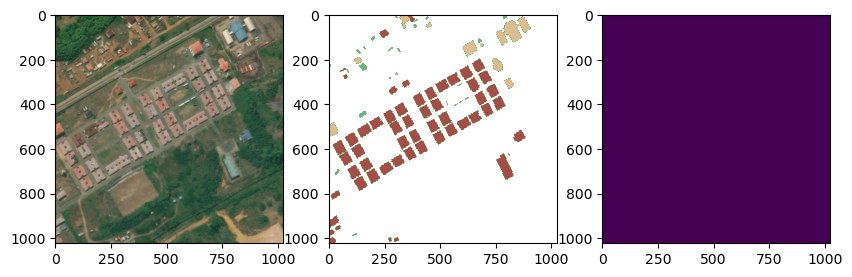

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(np.array(test[0].squeeze(0)[..., :3], dtype=np.uint8))
axs[1].imshow(np.array(test[1].squeeze(0), dtype=np.uint8), cmap=cmap)
axs[2].imshow(np.array(test[2].squeeze(0)[..., 1], dtype=np.uint8))